# CWT and DWT inverse

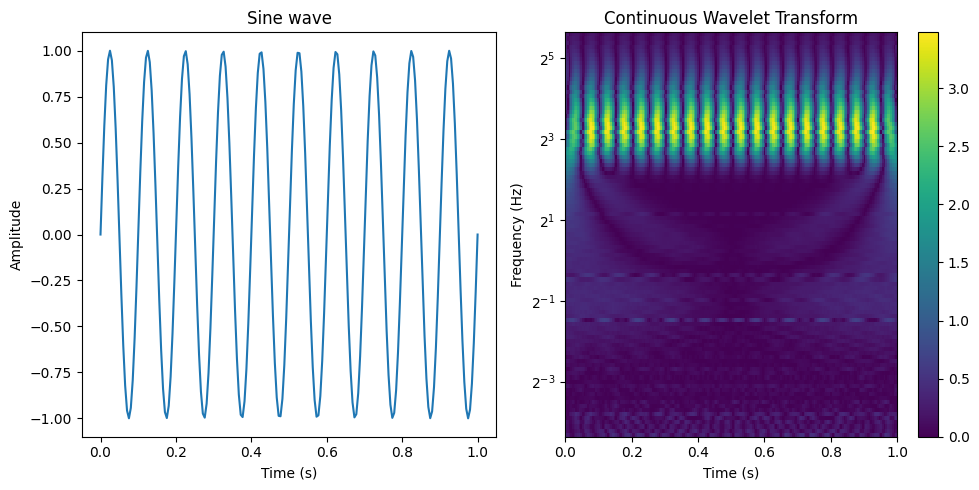

In [71]:
import pywt
import numpy as np
import matplotlib.pyplot as plt

time = np.linspace(0, 1, 200)
sin = np.sin(2*np.pi*time*10)  # 10 Hz sine wave

# Continuous Wavelet Transform
widths = np.geomspace(1, 1024, num=100)
sampling_period = np.diff(time).mean()
coeffs_cwt, freqs_cwt = pywt.cwt(sin, widths, 'mexh', sampling_period=sampling_period)
coeffs_cwt = np.abs(coeffs_cwt[:-1, :-1])

# adjust the figure size
plt.rcParams["figure.figsize"] = (10, 5)

# plot the singal
fig, axs = plt.subplots(1, 2)
axs[0].plot(time, sin)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sine wave")

# plot result using matplotlib's pcolormesh
pcm = axs[1].pcolormesh(time, freqs_cwt, coeffs_cwt)
axs[1].set_yscale("log", base=2)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Frequency (Hz)")
axs[1].set_title("Continuous Wavelet Transform")
fig.colorbar(pcm, ax=axs[1])

fig.tight_layout()

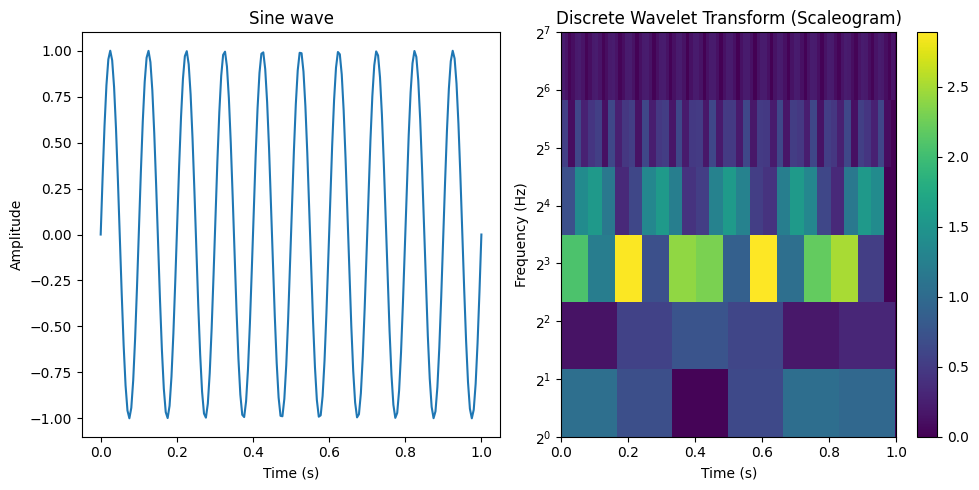

In [66]:
# Discrete Wavelet Transform
level = 5
wavelet = 'db1'
coeffs_dwt = pywt.wavedec(sin, wavelet, level=level)

coeffs_ext = []
duration = len(sin)

for i, coeff in enumerate(coeffs_dwt):
    coeff = np.abs(coeff[:-1])
    factor = duration / len(coeff)
    c_ext = [item for item in coeff for _ in range(int(factor))]
    coeffs_ext.append(c_ext)

# Create a 2D array for the scaleogram
scaleogram = np.zeros((level+1, duration))

# Fill the scaleogram with coefficients
for i, coeff in enumerate(coeffs_ext):        
    scaleogram[i, :len(coeff)] = coeff

scaleogram = scaleogram[:, :duration-1]

# Calculate the frequencies for each level (scales are powers of 2, so freqs are powers of 2)
freqs_dwt = np.logspace(start=0, stop=level+2, num=level+2, base=2)

# adjust the figure size
plt.rcParams["figure.figsize"] = (10, 5)

# plot the singal
fig, axs = plt.subplots(1, 2)
axs[0].plot(time, sin)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sine wave")

# plot result using matplotlib's pcolormesh (image with annoted axes)
pcm = axs[1].pcolormesh(time, freqs_dwt, scaleogram)
axs[1].set_yscale("log", base=2)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Frequency (Hz)")
axs[1].set_title("Discrete Wavelet Transform (Scaleogram)")
fig.colorbar(pcm, ax=axs[1])

fig.tight_layout()

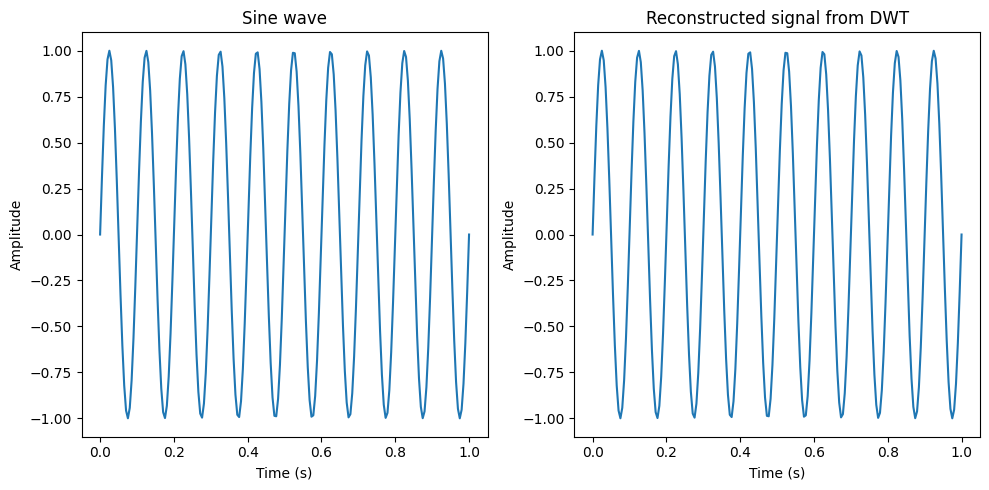

In [67]:
# Inverse discrete wavelet transform
reconstructed_signal = pywt.waverec(coeffs_dwt, wavelet)

# plot the singal
fig, axs = plt.subplots(1, 2)
axs[0].plot(time, sin)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sine wave")

# plot the reconstructed signal
axs[1].plot(time, reconstructed_signal)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Reconstructed signal from DWT")

fig.tight_layout()

In [79]:
# reconstruct the signal from the CWT
import numpy as np
import pywt

def reconstruct_signal_from_cwt(coeffs, scales, wavelet, dt):
    """
    Reconstruct the signal from the CWT coefficients and frequencies.

    Parameters:
    coeffs (ndarray): CWT coefficients.
    freqs (ndarray): Frequencies corresponding to the CWT coefficients.
    wavelet (str): Wavelet used for the CWT.
    dt (float): Sampling interval of the original signal.

    Returns:
    ndarray: Reconstructed signal.
    """
    # Get the wavelet function
    wavelet = pywt.ContinuousWavelet(wavelet)
    print(len(wavelet))
    
    # Compute the wavelet Fourier transform
    # make scales 1-dim
    wavelet = np.atleast_1d(wavelet)
    psi_ft, _ = pywt.integrate_wavelet(wavelet, scales)
    
    # Normalize
    C_psi = np.trapz(psi_ft**2 / scales[:, None], scales, axis=0)
    
    # Reconstruct the signal using summation over scales
    reconstruction = np.zeros(coeffs.shape[1])
    for i, scale in enumerate(scales):
        reconstruction += (coeffs[i, :] * psi_ft[i]).real / scale**1.5
    
    return reconstruction * (2 / np.sqrt(C_psi)) * dt

reconstructed_signal = reconstruct_signal_from_cwt(coeffs_cwt, widths, 'mexh', sampling_period)

# plot the singal
fig, axs = plt.subplots(1, 2)
axs[0].plot(time, sin)
axs[0].set_xlabel("Time (s)")
axs[0].set_ylabel("Amplitude")
axs[0].set_title("Sine wave")

# plot the reconstructed signal
axs[1].plot(time, reconstructed_signal)
axs[1].set_xlabel("Time (s)")
axs[1].set_ylabel("Amplitude")
axs[1].set_title("Reconstructed signal from CWT")

fig.tight_layout()


TypeError: object of type 'pywt._extensions._pywt.ContinuousWavelet' has no len()